In [1]:
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Read the CSV file into a DataFrame with header=None
data = pd.read_csv("filtered_file duplicate.csv", header=None)

# Extract the first row as column names and remove it from the DataFrame
column_names = data.iloc[0]
data = data[1:]

# Set the column names to the DataFrame
data.columns = column_names
data.head(5)

,selected_text,sentiment
1,"I`d have responded, if I were going",3
2,Sooo SAD,1
3,bullying me,1
4,leave me alone,1
5,"Sons of bitches,",1


In [3]:
data2 = pd.read_csv("Apple-Twitter-Sentiment-DFE.csv", sep=';', encoding='utf-8', header = 0)
headers = data2.iloc[0]
data2.columns = headers
data2 = data2.iloc[1:]
filtered_data = pd.DataFrame()
filtered_data['selected_text'] = data2['text']
filtered_data['sentiment'] = data2['sentiment']
filtered_data.head(5)

,selected_text,sentiment
1,#AAPL:The 10 best Steve Jobs emails ever...htt...,3
2,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,3
3,My cat only chews @apple cords. Such an #Apple...,3
4,I agree with @jimcramer that the #IndividualIn...,3
5,Nobody expects the Spanish Inquisition #AAPL,3


In [4]:
data3 = pd.read_csv("Tweets.csv", header = None)
headers = data3.iloc[0]
data3.columns = headers
data3 = data3.iloc[1:]
filtered_data2 = pd.DataFrame()
filtered_data2['selected_text'] = data3['text']
filtered_data2['sentiment'] = data3['sentiment']

sentiment_mapping = {'positive': 5, 'negative': 1, 'neutral': 3}
filtered_data2['sentiment'] = filtered_data2['sentiment'].replace(sentiment_mapping)

# Now, 'sentiment' column contains the mapped integer values
filtered_data2['sentiment'] = filtered_data2['sentiment'].astype(int)


filtered_data2.head(100000)

,selected_text,sentiment
1,"I`d have responded, if I were going",3
2,Sooo SAD I will miss you here in San Diego!!!,1
3,my boss is bullying me...,1
4,what interview! leave me alone,1
5,"Sons of ****, why couldn`t they put them on t...",1
...,...,...
27477,wish we could come see u on Denver husband l...,1
27478,I`ve wondered about rake to. The client has ...,1
27479,Yay good for both of you. Enjoy the break - y...,5
27480,But it was worth it ****.,5


In [5]:
#combine the two data sets apple + general
data = pd.concat([data, filtered_data], axis=0)
data.head(100000)

,selected_text,sentiment
1,"I`d have responded, if I were going",3
2,Sooo SAD,1
3,bullying me,1
4,leave me alone,1
5,"Sons of bitches,",1
...,...,...
3882,(Via FC) Apple Is Warming Up To Social Media -...,3
3883,RT @MMLXIV: there is no avocado emoji may I as...,3
3884,@marcbulandr I could not agree more. Between @...,5
3885,My iPhone 5's photos are no longer downloading...,1


In [6]:
data = pd.concat([data, filtered_data2], axis=0)
data.head(100000)

,selected_text,sentiment
1,"I`d have responded, if I were going",3
2,Sooo SAD,1
3,bullying me,1
4,leave me alone,1
5,"Sons of bitches,",1
...,...,...
27477,wish we could come see u on Denver husband l...,1
27478,I`ve wondered about rake to. The client has ...,1
27479,Yay good for both of you. Enjoy the break - y...,5
27480,But it was worth it ****.,5


In [21]:
# Check unique values in the 'sentiment' column
unique_sentiments = data['sentiment'].unique()
print(unique_sentiments)

# If 'not_relevant' is present, remove those rows or replace it with a valid integer label
data = data[data['sentiment'] != 'not_relevant']

# Now, convert the 'sentiment' column to integers
sentiment_mapping = {'positive': 5, 'negative': 1, 'neutral': 3}
data['sentiment'] = data['sentiment'].replace(sentiment_mapping)
data['sentiment'] = data['sentiment'].astype(int)

['3' '1' '5' 3 1 5]


In [50]:
# Separate the DataFrame into three DataFrames based on sentiment values
sentiment_1_df = data[data['sentiment'] == 1]
sentiment_3_df = data[data['sentiment'] == 3]
sentiment_5_df = data[data['sentiment'] == 5]

# Determine the minimum number of rows among the three sentiment DataFrames
min_rows = min(len(sentiment_1_df), len(sentiment_3_df), len(sentiment_5_df))

# Randomly sample the same number of rows from each sentiment DataFrame
sampled_sentiment_1_df = sentiment_1_df.sample(n=min_rows, random_state=42)
sampled_sentiment_3_df = sentiment_3_df.sample(n=min_rows, random_state=42)
sampled_sentiment_5_df = sentiment_5_df.sample(n=min_rows, random_state=42)

# Concatenate the sampled DataFrames to create the final DataFrame
final_df = pd.concat([sampled_sentiment_1_df, sampled_sentiment_3_df, sampled_sentiment_5_df])

# Shuffle the final DataFrame to randomize the order of rows
final_df = final_df.sample(frac=1, random_state=42)
data = final_df

In [51]:
data['selected_text'] = data['selected_text'].fillna('')
data['selected_text'] = data['selected_text'].str.lower()
data['selected_text'] = data['selected_text'].str.replace(r'http\S+', '', regex=True)
data['selected_text'] = data['selected_text'].str.replace(r'@\S+', '', regex=True)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['selected_text'])
vectorizer.get_feature_names_out()
y = data['sentiment']

In [52]:
y.shape

(50343,)

In [53]:
X.shape

(50343, 26257)

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.6)

In [55]:
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [56]:
y_pred = model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
classification = classification_report(Y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           1       0.81      0.67      0.73     10110
           3       0.61      0.79      0.69     10003
           5       0.84      0.72      0.78     10093

    accuracy                           0.73     30206
   macro avg       0.75      0.73      0.73     30206
weighted avg       0.75      0.73      0.73     30206



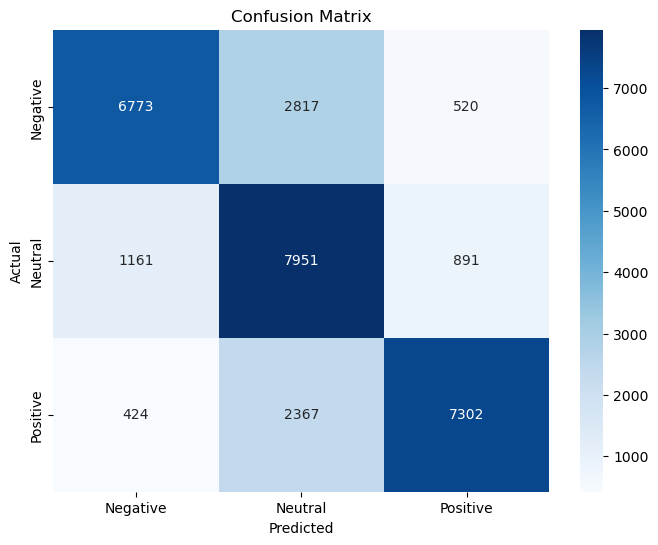

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
def analyze_sentiment(input_text):
    # Preprocess the input text
    input_text = input_text.lower()

    # Transform the input text using the same TF-IDF vectorizer
    input_tfidf = vectorizer.transform([input_text])

    # Predict the sentiment for the input text
    predicted_sentiment = model.predict(input_tfidf)[0]

    return predicted_sentiment

In [75]:
analyze_sentiment("I gave my teacher an apple today, i injected the apple with potasium cyanide. to the moon")

3